Sólo figuras aquí, todos los cálculos serios en el otro notebook please.

In [9]:
using Statistics
using PyPlot
using JLD
#acuerdate: no quieres svg interpolados
matplotlib.rcParams[:"svg.image_noscale"]=false
salvadir="/home/karel/Dropbox/ArticulosNeurociencias/misfiguras/"

"/home/karel/Dropbox/ArticulosNeurociencias/misfiguras/"

In [98]:
using Interpolations
using Dierckx

┌ Info: Precompiling Dierckx [39dd38d3-220a-591b-8e3c-4c3a8c710a94]
└ @ Base loading.jl:1192


In [2]:
function ListaPixelesdeLinea(x::Array, y::Array)
    #obtener una lista de pixeles/electrodos a lo largo de una linea con dos endpoints enteros.
    #Se ponen las dos coordenadas x en un arreglo y las dos y en otro-
    xuno, xdos=x[1], x[2]
    yuno, ydos=y[1],y[2]
    if abs(xuno-xdos)>= abs(yuno-ydos)

        longitud=abs(xuno-xdos)
        m=(ydos-yuno)/(xdos-xuno)
        xresult=collect(xuno:xdos) #asumimos que el xdos es el grande!
        yresult=zeros(Int, longitud+1)
        for j in 1:longitud+1
            yresult[j]=round(Int,yuno+(j-1)*m)
        end
    else
        
        longitud=abs(yuno-ydos)
        m=(xdos-xuno)/(ydos-yuno)
        yresult=collect(yuno:ydos) #asumimos que el ydos es el grande!
        xresult=zeros(Int, longitud+1)
    for j in 1:longitud+1
        xresult[j]=round(Int,xuno+(j-1)*m)
    end
   
    end
        
    return (xresult,yresult)
end

ListaPixelesdeLinea (generic function with 1 method)

vamos a usar 3R7 (Evocado) para las gráficas evocadas.

In [3]:
arxlfp="../JLDFiles/Evocada/LFPDesaturado_3R7.jld"

LFPSaturado=load(arxlfp, "LFPSaturados")
LFPPlanchado=load(arxlfp, "LFPDenoized")

Dict{AbstractString,Array} with 3 entries:
  "Trancazo_2" => [23.0 22.1558 … 28.1982 32.2266; -10.0708 -56.3965 … -20.1416…
  "Trancazo_1" => [-25.0 -18.1274 … -16.1133 -18.1274; -6.04248 -70.4956 … -2.0…
  "Trancazo_3" => [-12.0 -14.0991 … -46.3257 6.04248; 0.0 -10.0708 … -28.1982 1…

In [4]:
nmax=248 #la actividad respuesta se muere poco antes de este cuadro.
(alto, ancho, nn)=size(LFPPlanchado["Trancazo_3"])

(64, 64, 457)

In [5]:
LFPProm=LFPPlanchado["Trancazo_1"]+LFPPlanchado["Trancazo_2"]+LFPPlanchado["Trancazo_3"]
LFPProm/=3;

Dice Rafael que el F siempre no, que no lo pongamos

In [6]:
puntox=[36,36,36,36,36,36]
puntoy=[6,9,12,15,18,21]
puntol=["f","e", "d", "c", "b","a"];
#=
puntoy=puntoy+3

primax=[32, 32, 32, 32, 32, 32]
primay=[43,47,51,55,59,63]
primal=["F'","E'", "D'", "C'", "B'","A'"];
dobleprimax=[44,48,52,54,58,62]
dobleprimay=[38,36,34,32,30,28]
dobleprimal=["F''","E''", "D''", "C''", "B''","A''"];
=#
(muchasx,muchasy)=ListaPixelesdeLinea([puntox[2],puntox[end]],[puntoy[2],puntoy[end]])
length(muchasx)

13

In [7]:
xizq=24
xder=48
ybajo=6
yalto=30
tiemposinteresantes=(28,63,70,77,84,91,95,98,105)
retraso=35
freq=7.022 # kHz (por alguna razon no en los archivos!!!)

7.022

In [155]:
GDpunts=[[42 36];  [50 40];  [63.5 38];  [62.5 29]; [61 22];  [55 15]]

CApunts=[[45 25]; [40 18]; [30  15]; [20 18]; [15 25]; [22 37]; [45 56]]

7×2 Array{Int64,2}:
 45  25
 40  18
 30  15
 20  18
 15  25
 22  37
 45  56

In [156]:
gdxin=interpolate(vec(GDpunts[:,1]), BSpline(Cubic(Flat(OnCell()))))
gdyin=interpolate(vec(GDpunts[:,2]), BSpline(Cubic(Flat(OnCell()))))
gdx=gdxin(range(1,6, step=0.25))
gdy=gdyin(range(1,6, step=0.25))

caxin=interpolate(vec(CApunts[:,1]), BSpline(Cubic(Flat(OnCell()))))
cayin=interpolate(vec(CApunts[:,2]), BSpline(Cubic(Flat(OnCell()))))
cax=caxin(range(1,7, step=0.25))
cay=cayin(range(1,7, step=0.25));


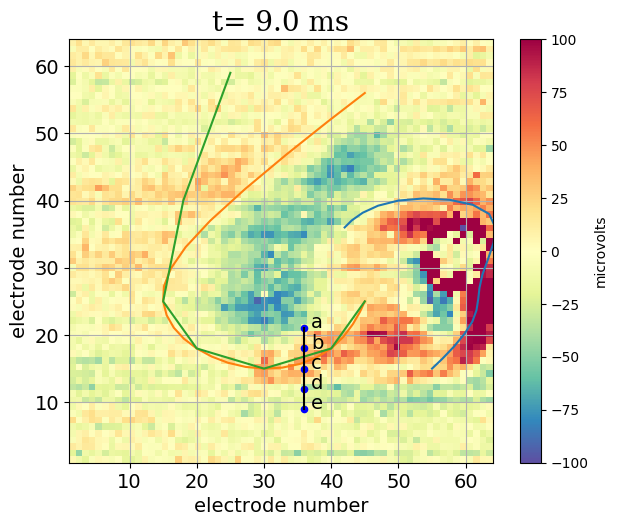

In [157]:
cuadro=98
exdesaturado=LFPProm[:,:,cuadro];
figure(figsize=(7.0,5.5))
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>20)
milisec=round((cuadro-retraso)/freq; digits=1)

title("t= $milisec ms", fontdict=font1)
limites=100
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)

for punto in 2:6
   annotate(puntol[punto], (puntox[punto], puntoy[punto]), xytext=(5,0), textcoords="offset points", fontsize=14)
   # annotate(primal[punto], (primax[punto], primay[punto]), xytext=(-18,-4), textcoords="offset points", fontsize=14)
   # annotate(dobleprimal[punto], (dobleprimax[punto], dobleprimay[punto]), xytext=(-18,-4), 
   # textcoords="offset points", fontsize=14)
end

imagen=imshow(exdesaturado, 
interpolation="nearest", cmap="Spectral_r", origin="lower", vmin=-limites, vmax=limites, extent=[1,64,1,64])
tick_params(axis="both", labelsize=14)

#scatter(muchasx,muchasy, marker="o", s=20, c="b")

scatter(puntox[2:end],puntoy[2:end], marker="o", s=20, c="b")

plot(gdx, gdy)
plot(cax, cay)
plot(CAinterpol[:,1], CAinterpol[:,2])
#scatter(primax,primay, marker="d", s=20, c="grey")
#scatter(dobleprimax,dobleprimay, marker="s", s=20, c="grey")

#Dice Rafael que quitemos el F

plot([puntox[2], puntox[end]], [puntoy[2], puntoy[end]], "k-")

cbx=colorbar(imagen, fraction=0.045) 
cbx.set_label("microvolts") #okey, no hay consenso de cuando es dot overloading y cuando es [:esto]
tick_params(axis="both", labelsize=14)

xlabel("electrode number", fontsize=14)
ylabel("electrode number", fontsize=14)
grid()

#savefig("LFP_Promedio_3R7-2-$cuadro.svg", dpi=90)

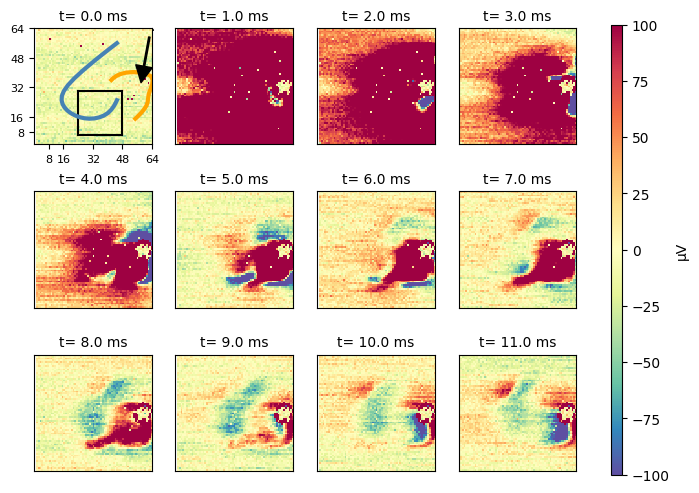

In [163]:
farofa, lista=subplots(3,4, figsize=(7,6)) #mas o menos tamano carta

aux=[]

milisec=round((cuadro-retraso)/freq, digits=1)


for j=1:3, k=1:4
    
    n=((j-1)*4+(k-1))*7+(retraso)
    lfp=LFPProm[:,:,n]
    milisec=round((n-retraso)/freq, digits=1)

    aux=lista[j,k].imshow(lfp, interpolation="nearest", cmap="Spectral_r", 
    origin="lower", vmin=-limites, vmax=limites, extent=[1,64,1,64])

     lista[j,k].set_title("t= $milisec ms", fontsize=10)
    
    lista[j,k].set_xlim(0,64)
    
    if k != 1 || j != 1
        lista[j,k].set_xticks([])
        lista[j,k].set_yticks([])
        
        
        
    else
        
          lista[j,k].plot([xizq, xder], [ybajo, ybajo], "k-")
        lista[j,k].plot([xizq, xder], [yalto, yalto], "k-")
        lista[j,k].plot([xizq, xizq], [ybajo, yalto], "k-")
        lista[j,k].plot([xder, xder], [ybajo, yalto], "k-")
        
       lista[j,k].tick_params(labelsize=8)
        lista[j,k].set_xticks([8,16,32,48,64])
        lista[j,k].set_yticks([8,16,32,48, 64])
        
        lista[j,k].annotate(".", (58,34), xytext=(63,63),
            arrowprops=Dict("facecolor"=>"black", 
                "shrink"=>0.02, "width"=>1))
        
        lista[j,k].plot(gdx, gdy, c="orange", lw=3) 
       lista[j,k].plot(cax, cay, c="steelblue", lw=3)
        
    end
    

end



cbaxes = farofa.add_axes([0.95, 0.12, 0.015, 0.75]) 

 cbxlfp=farofa.colorbar(aux, cax=cbaxes,
    #ax=lista[:,4], 
    shrink=1.0, aspect=80
    #  location="right",
    )
    
   # cbx=colorbar(imagen, fraction=0.045) 
  cbxlfp.set_label("µV") #okey, no hay consenso de c

nomsave=salvadir*"lfpevocado01.svg"
savefig(nomsave, dpi=150, bbox_inches="tight")

Dice Rafael que quitemos el Punto F y hagamos mas chiquito el Cuadro...

In [170]:
SubDatLFP=getindex(LFPProm, ybajo:yalto,xizq:xder,1:nmax);
SubDatCSD=getindex(CSDPlanchadoPromedio, ybajo:yalto,xizq:xder,1:nmax);


In [10]:
#=
ioff()
for t=retraso:(retraso+2) # nmax
 figura=figure(figsize=(7.0,5.5))
    imagen=imshow(SubDatLFP[:,:,t], origin="lower", interpolation="sinc", 
    vmin=-200,vmax=200, extent=(xizq,xder,ybajo,yalto),cmap="plasma")
 cbx=colorbar(imagen, fraction=0.045) 
    
    savefig("EvocadoPeli-$t.png",dpi=92)
    close(figura)
end
close()
=#

In [164]:
arxcsd="../JLDFiles/Evocada/CSDEvocada_3R7.jld"
CSD=load(arxcsd, "CSD")
CSDPlanchado=load(arxcsd, "CSDPlanchada")
CSDPromedio=CSD["Trancazo_1"]+CSD["Trancazo_2"]+CSD["Trancazo_3"]
CSDPlanchadoPromedio=CSDPlanchado["Trancazo_1"]+CSDPlanchado["Trancazo_2"]+CSDPlanchado["Trancazo_3"];
CSDPlanchadoPromedio/=3.0;

In [166]:
arxcm="../JLDFiles/Evocada/CSDEvocada_3R7-CM.jld"
cmpos=load(arxcm, "CMP")
cmneg=load(arxcm, "CMN");

In [167]:
#=tiempo=1:nmax
t=700


farofa, lista=subplots(15,15, sharex=true, sharey=true, figsize=(15,6*2.5))

for j=1:15,k=1:15
    xlim(-5,30)
    ylim(-400,400)
    yys=vec(SubDatos[j,k,tiempo])
    xxs=(tiempo.-retraso)/freq
    rojo=maximum(yys[70:nmax])/400
    if rojo>1
        rojo=0.99
    end
    lista[16-j,k].axis("off")
    lista[16-j,k].plot(xxs,yys, color=(rojo,0,0), lw=0.5)

end

lista[14,14].plot([25,30],[-330,-330], lw=1.5, c="k")
lista[14,14].annotate("5 ms", xy=(26,-300), fontsize=8)

lista[14,14].plot([25,25],[-330,-130], lw=1.5, c="k")
lista[14,14].annotate("200 µV", xy=(0,-230), fontsize=8)

savefig("MuchosTrazosSubMatrixView01.svg",dpi=92)
close()
=#

In [26]:
arxcat="../JLDFiles/CMNuevos/Catenarios4AP-Promedio-3.jld"
CatenarioPositivo=load(arxcat, "CatenarioPositivo")
CatenarioNegativo=load(arxcat, "CatenarioNegativo");

ErrorException: File ../JLDFiles/CMNuevos/Catenarios4AP-Promedio-3.jld cannot be found

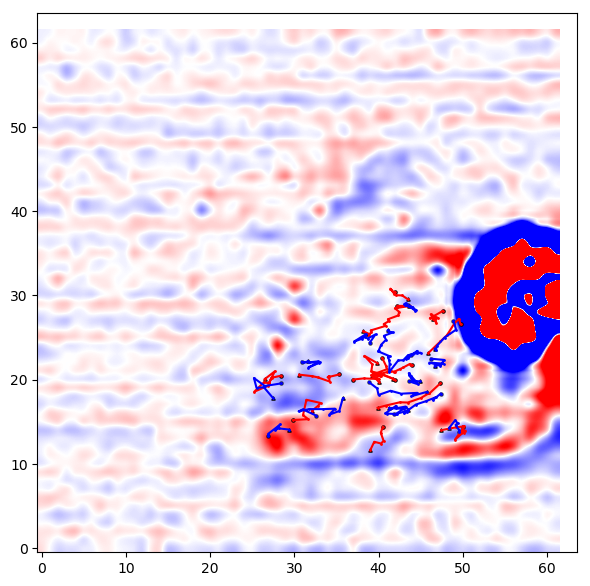

In [46]:
ion()
cuadro=95
excsd=CSDPlanchadoPromedio[:,:,cuadro];

figure(figsize=(6,6))
#axis("equal")
#tick_params(labelbottom="off", labelleft="off")
xlim(-0.50,63.5)
ylim(-0.5,63.5)
vlim=80
bolitasrojas=0
bolitasazules=0
minlargo=5
marcagor=5
muevemin=0.5
tight_layout()

guacafondo=imshow(excsd, cmap="bwr", interpolation="spline16", origin="lower", vmin=-vlim, vmax=vlim)

for p in CatenarioPositivo
    gordura=abs.(map(Float32,p[:,3]))
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32,p[:,2]))
    longus,falsus=size(p)
    if mean(gordura)> marcagor && (desviax>muevemin || desviay>muevemin) && longus> minlargo 
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1].+xizq
        yypos=p[:,2].+ybajo    
        tiempos=p[:,4]./7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="r")
        #bolitasrojas=scatter(xxpos,yypos, s=gordura, 
        #edgecolors="none", color="r" )
        inicios=scatter(xxpos[1],yypos[1], s=marcagor, edgecolors="black", 
        linewidth=1,
        facecolor="red", marker="o" )
        finales=scatter(xxpos[end],yypos[end], s=marcagor, edgecolors="black", 
        linewidth=1,facecolor="red", marker="^", label="Final" )
      #  annotate(round(tiempos[1]*1000,1),  (xxpos[1], yypos[1]), fontsize=7, color="black")
       # annotate(round(tiempos[end]*1000,1), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end




for p in CatenarioNegativo
    gordura=abs.(map(Float32,p[:,3]))
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32, p[:,2]))
    longus,falsus=size(p)
    if mean(gordura)>marcagor && (desviax>muevemin || desviay > muevemin) &&longus> minlargo
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1].+xizq
        yypos=p[:,2].+ybajo    
        tiempos=p[:,4]./7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="b")
        #bolitasazules=scatter(xxpos,yypos, s=gordura,
        #edgecolors="none", color="b")
        inicios=scatter(xxpos[1],yypos[1], s=marcagor, edgecolors="black", 
        linewidth=1,
        facecolor="blue", alpha=0.7, marker="o", label="Final" )
        finales=scatter(xxpos[end],yypos[end], s=marcagor, edgecolors="black", 
        linewidth=1,
        facecolor="blue", marker="^", label="Final" )
      #  annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
      #  annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end

#colorbar(bolitasrojas, fraction=0.046)
#colorbar(bolitasazules, fraction=0.052, ticks=[])

savefig("TrayectoriaEvocadaPromedio_3R7-Cuadro.svg", dpi=90)

In [30]:

font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
"size"=>16)
limcsd=60


for t=42:70:3 #tmax


 figure(figsize=(7.0,5.5))
 
    
 milisec=round((t-35)/7.022,digits=1)

 title("t= $milisec ms", fontdict=font1)
    imagen=imshow(SubDatos[:,:,t], origin="lower", 
        interpolation="nearest", 
        vmin=-limcsd,vmax=limcsd, extent=(xizq,xder,ybajo,yalto),cmap="coolwarm")
 cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
 cbx[:set_label]("<-Sink | Source->")
   
 savefig("CSDEvocadoPeliNew-$t.png",dpi=92)
close()
end



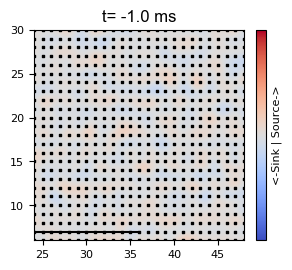

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[32]:22
└ @ Core In[32]:22


In [32]:

font1 = Dict("family"=>"Arial",
    "color"=>"black",
    "weight"=>"normal",
"size"=>12)
limcsd=60

#for t in tiemposinteresantes
t=28
 figure(figsize=(3.0,3.0))    
    xlim(xizq,xder)
    ylim(ybajo,yalto)
    milisec=round((t-retraso)/freq,digits=1)

 title("t= $milisec ms", fontdict=font1)
    imagen=imshow(SubDatCSDSD[:,:,t], origin="lower", interpolation="sinc", 
    vmin=-limcsd,vmax=limcsd, extent=(xizq,xder,ybajo,yalto),cmap="coolwarm")
    
    tick_params(labelsize=8, direction="out")
        
    cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
    cbx[:set_label]("<-Sink | Source->", fontsize=8)
    plot([xizq, xizq+12],[ybajo+1,ybajo+1],color="black")

    
xele=xizq:xder
yele=ybajo:yalto
    
for xi in xele, yi in yele
    scatter(xi,yi, s=1, color="black", marker="s")
end

   # tight_layout()
    savefig("CSDEvocado-$t.svg",dpi=92)


#end

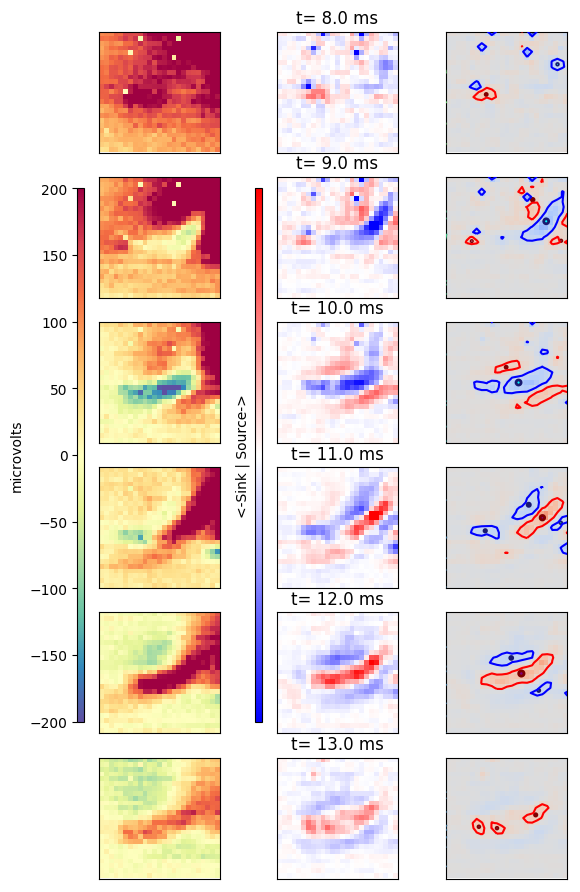

In [219]:
farofa, lista=subplots(6,3, figsize=(6.5,11)) #mas o menos tamano carta

vlim=200
csdlim1=75
csdlim2=200
freq=7.022
imagenlfp=lista[:,1]
imagencsd=lista[:,2]
epsi=25
vs=[-epsi,epsi]
#cbax= farofa.add_axes([0.08,0.08, 0.09, 0.8])

for j=1:6
    n=35+21+(j-1)*7
  lfp=SubDatLFP[:,:,n]  
  csd=SubDatCSD[:,:,n]  
    tau=round(n/freq, digits=1)
    tit="t= $tau ms"
 imagenlfp=lista[j,1].imshow(lfp, origin="lower", vmin=-vlim, vmax=vlim,
        cmap="Spectral_r", interpolation="nearest")
 
    
      #uando es dot overloading y cuando es [:esto]
    
 imagencsd=lista[j,2].imshow(csd, origin="lower", vmin=-csdlim1, vmax=csdlim1, 
        cmap="bwr",interpolation="nearest")
 lista[j,2].set_title(tit)

xxpos=cmpos[n][:,1]
yypos=cmpos[n][:,2]
gorpos=cmpos[n][:,3]./400

xxneg=cmneg[n][:,1]
yyneg=cmneg[n][:,2]
gorneg=abs.(cmneg[n])[:,3]./400

    
 lista[j,3].set_xlim([xizq,xder])
 lista[j,3].set_ylim([ybajo,yalto])
    
lista[j,3].imshow(csd, origin="lower", 
        vmin=-csdlim2, vmax=csdlim2, cmap="coolwarm", 
        interpolation="nearest", extent=[xizq,xder,ybajo,yalto], zorder=1)

        lista[j,3].contour(csd, 2, lw=3, zorder=4)

    
    lista[j,3].scatter(xxpos, yypos, s=gorpos, c="purple", edgecolor="maroon", lw=2, zorder=2)
lista[j,3].scatter(xxneg, yyneg, s=gorneg, c="cyan", edgecolor="midnightblue", lw=2, zorder=2)

    lista[j,3].contour(csd, vs, lw=3, colors=("blue", "red"),
        extent=[xizq,xder,ybajo,yalto], zorder=4)
    
    for k=1:3
        lista[j,k].set_xticks([])
        lista[j,k].set_yticks([])
    end
    

end


 cbxlfp=farofa.colorbar(imagenlfp, ax=lista[:,1], shrink=1.0, 
      location="left", aspect=80, fraction=0.045)
    
   # cbx=colorbar(imagen, fraction=0.045) 
  cbxlfp.set_label("microvolts") #okey, no hay consenso de c

 cbxcsd=farofa.colorbar(imagencsd, ax=lista[:,2], shrink=1.0,
      location="left", aspect=80, fraction=0.045, ticks=[])
   cbxcsd.set_label("<-Sink | Source->")

nomsave=salvadir*"TablaLFPCSDCMSubCA3-Evocadca_3R7.pdf"
savefig(nomsave,dpi=100)

In [182]:
extrema(SubDatCSD[:,:,200])

(-7.258130346353286, 7.551662430646092)

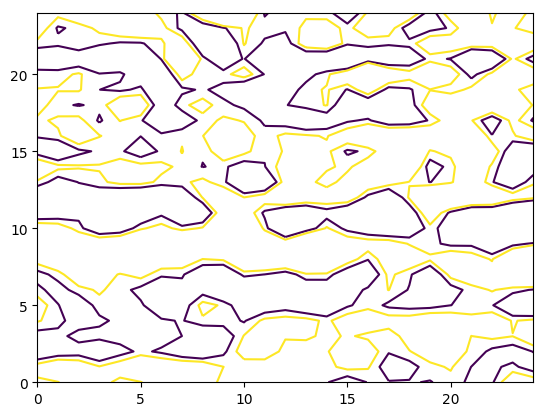

PyObject <matplotlib.contour.QuadContourSet object at 0x7f72b3a9d518>

In [204]:
contour(SubDatCSD[:,:,120], [-1,1])